<div style="background-image: url('../../OIG2.png');
     background-size: cover;
     background-position: center;
     padding: 30px;
     border-radius: 15px;
     color: #fff;
     font-family: Arial, sans-serif;
     line-height: 1.6;
">
<h1 style="background: linear-gradient(45deg, #e12c2cff, #ffd582ff, #ff6600);  
           -webkit-background-clip: text; 
           -webkit-text-fill-color: transparent; 
           font-size: 2.5em; 
           font-weight: bold;">
    FinRisk AI - Credit Score Tahmini
</h1>

<h2 style="background: linear-gradient(45deg, #e12c2cff, #ffd582ff, #ff6600); 
           -webkit-background-clip: text; 
           -webkit-text-fill-color: transparent;">Başlamadan Önce – Senaryo</h2>

<p>Bir bankada veri bilimci olarak çalışıyorsunuz. Business’tan düşen talep:</p>
<blockquote style="background:#fff3cd; color:#856404; padding:10px; border-left:5px solid #ffeeba;">
“Kredi skorları düşüyor, riskli müşterilere kredi veriyoruz. Bunu önceden tahmin edebilir miyiz?”
</blockquote>

<p><b>Amaç:</b></p>
<ul>
  <li>Müşterilerin <b>Credit_Score</b> (Good / Standard / Poor) değerini tahmin etmek.</li>
  <li>Riskli müşterileri erken tespit ederek batık krediyi azaltmak.</li>
  <li>Süreçleri otomatikleştirip kararları hızlandırmak.</li>
</ul>

<p><em>Not:</em> Problem bir <b>multi-class classification</b> problemidir. Basit kurallar işe yaramayabilir; bu yüzden ML seçildi.</p>

<hr style="border:1px solid #e0e0e0;">

<h2 style="background: linear-gradient(45deg, #e12c2cff, #ffd582ff, #ff6600); 
           -webkit-background-clip: text; 
           -webkit-text-fill-color: transparent;">1️⃣ Veri Hazırlığı (Data Preparation)</h2>

<h3 style="background: linear-gradient(45deg, #e12c2cff, #ffd582ff, #ff6600); 
           -webkit-background-clip: text; 
           -webkit-text-fill-color: transparent;">1.1 Eksik Değer ve Tip Kontrolü</h3>
<ul>
  <li>Eksik değerler incelendi; bazı kolonlar <b>domain bazlı doldurulacak</b> (Monthly_Inhand_Salary, Type_of_Loan vb.).</li>
  <li>Numeric olmasına rağmen <b>object</b> tipli kolonlar temizlenecek / parse edilecek:
    <ul>
      <li>Age, Annual_Income, Outstanding_Debt, Num_of_Delayed_Payment</li>
      <li>Credit_History_Age → “XX Years YY Months” → toplam aya çevrilecek</li>
    </ul>
  </li>
</ul>

<h3 style="background: linear-gradient(45deg, #e12c2cff, #ffd582ff, #ff6600); 
           -webkit-background-clip: text; 
           -webkit-text-fill-color: transparent;">1.2 Drop / Noise Kandidatları</h3>
<ul>
  <li><b>High-cardinality kolonlar:</b> ID, Customer_ID, Name, SSN, Monthly_Balance, Amount_invested_monthly → modelde gürültü yarattığı için drop edildi</li>
  <li>Düşük bilgi taşıyan kolonlar da çıkarıldı</li>
</ul>

<h3 style="background: linear-gradient(45deg, #e12c2cff, #ffd582ff, #ff6600); 
           -webkit-background-clip: text; 
           -webkit-text-fill-color: transparent;">1.3 Kategorik Kolonlar</h3>
<ul>
  <li>Payment_Behaviour → ordinal encoding</li>
  <li>Occupation, Month, Payment_Status → one-hot encoding</li>
  <li>Gender → binary encoding</li>
</ul>

<h3 style="background: linear-gradient(45deg, #e12c2cff, #ffd582ff, #ff6600); 
           -webkit-background-clip: text; 
           -webkit-text-fill-color: transparent;">1.4 Outlier Kontrolü</h3>
<ul>
  <li>Num_of_Loan, Num_of_Delayed_Payment, Credit_Utilization_Ratio → mantıksız veya uç değerler domain bazlı düzeltilecek</li>
</ul>

<h3 style="background: linear-gradient(45deg, #e12c2cff, #ffd582ff, #ff6600); 
           -webkit-background-clip: text; 
           -webkit-text-fill-color: transparent;">1.5 Hedef Değişken</h3>
<ul>
  <li>Credit_Score label encoding ile hazırlandı: Good = 2, Standard = 1, Poor = 0</li>
</ul>

<hr style="border:1px solid #e0e0e0;">

<h2 style="background: linear-gradient(45deg, #e12c2cff, #ffd582ff, #ff6600); 
           -webkit-background-clip: text; 
           -webkit-text-fill-color: transparent;">2️⃣ Keşifsel Veri Analizi (EDA)</h2>

<h3 style="background: linear-gradient(45deg, #e12c2cff, #ffd582ff, #ff6600); 
           -webkit-background-clip: text; 
           -webkit-text-fill-color: transparent;">2.1 Numeric Feature Insights</h3>
<ul>
  <li>Monthly_Inhand_Salary: %15 missing → domain bazlı imputation planlandı</li>
  <li>Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Delay_from_due_date, Num_Credit_Inquiries, Total_EMI_per_month: outlier kontrolü</li>
  <li>Train/Test dağılımları genelde uyumlu</li>
</ul>

<h3 style="background: linear-gradient(45deg, #e12c2cff, #ffd582ff, #ff6600); 
           -webkit-background-clip: text; 
           -webkit-text-fill-color: transparent;">2.2 Categorical Feature Insights</h3>
<ul>
  <li>Month, Occupation, Payment_of_Min_Amount, Payment_Behaviour: dağılımlar incelendi</li>
  <li>Multi-label kolonlar (Type_of_Loan) parse edilip model için hazırlandı</li>
</ul>

<h3 style="background: linear-gradient(45deg, #e12c2cff, #ffd582ff, #ff6600); 
           -webkit-background-clip: text; 
           -webkit-text-fill-color: transparent;">2.3 Feature-Target İlişkisi</h3>
<ul>
  <li>Yüksek Num_of_Delayed_Payment → Poor skor artışı</li>
  <li>Düşük Monthly_Inhand_Salary → risk artışı</li>
  <li>Payment_Behaviour ve Type_of_Loan → sınıf tahmininde belirleyici</li>
</ul>

<hr style="border:1px solid #e0e0e0;">

<h2 style="background: linear-gradient(45deg, #e12c2cff, #ffd582ff, #ff6600); 
           -webkit-background-clip: text; 
           -webkit-text-fill-color: transparent;">3️⃣ Feature Selection Mantığı</h2>
<ul>
  <li>Domain bazlı önemli: Monthly_Inhand_Salary, Type_of_Loan, Credit_History_Age, Num_of_Delayed_Payment, Payment_Behaviour</li>
  <li>Drop edilenler: ID, Customer_ID, Name, SSN, Monthly_Balance, Amount_invested_monthly</li>
  <li>High-cardinality threshold: 20 → çok benzersiz kolonlar çıkarıldı</li>
  <li>Toplam: 27+1 kolon model için alınacak (Credit_Score dahil)</li>
</ul>

<hr style="border:1px solid #e0e0e0;">

<h2 style="background: linear-gradient(45deg, #e12c2cff, #ffd582ff, #ff6600); 
           -webkit-background-clip: text; 
           -webkit-text-fill-color: transparent;">4️⃣ Baseline Model – Naive Bayes</h2>

<h3 style="background: linear-gradient(45deg, #e12c2cff, #ffd582ff, #ff6600); 
           -webkit-background-clip: text; 
           -webkit-text-fill-color: transparent;">Neden Naive Bayes?</h3>
<ul>
  <li>Baseline olarak hızlı, kolay ve açıklanabilir</li>
  <li>Kategorik ağırlıklı feature’lar ve düşük dimensionality için uygun</li>
</ul>

<h3 style="background: linear-gradient(45deg, #e12c2cff, #ffd582ff, #ff6600); 
           -webkit-background-clip: text; 
           -webkit-text-fill-color: transparent;">Adımlar</h3>
<ol>
  <li>Train-test split (stratified)</li>
  <li>Kategorik → one-hot / ordinal encoding</li>
  <li>Numeric → StandardScaler (opsiyonel)</li>
  <li>Naive Bayes fit</li>
  <li>Performans ölçümleri: Accuracy, Macro F1, Confusion Matrix</li>
</ol>

<h3 style="background: linear-gradient(45deg, #e12c2cff, #ffd582ff, #ff6600); 
           -webkit-background-clip: text; 
           -webkit-text-fill-color: transparent;">Beklenen Çıkarımlar</h3>
<ul>
  <li>Good sınıfı genellikle doğru tahmin edilir</li>
  <li>Poor sınıfında hata daha yüksek olabilir → dengesizlik ve sınırlı numeric bilgi</li>
  <li>Baseline sonuçları ileri modelleme (Random Forest, XGBoost) için referans</li>
</ul>

</div>


<h2 style="background: linear-gradient(45deg, #e12c2cff, #ffd582ff, #ff6600);  
           -webkit-background-clip: text; 
           -webkit-text-fill-color: transparent;font-weight: bold">
    Libraries
</h2>

In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# For visualization
from IPython.display import HTML, display
import html
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report, confusion_matrix, roc_auc_score 
from sklearn.linear_model import LogisticRegression

<h2 style="background: linear-gradient(45deg, #e12c2cff, #ffd582ff, #ff6600); 
           -webkit-background-clip: text; 
           -webkit-text-fill-color: transparent;font-weight: bold">
    Data Loading & Inspection
</h2>

In [2]:
# Load Raw Data
train_path = "../../train.csv"
test_path = "../../test.csv"

# Suppress dtype warnings for cleaner output
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.DtypeWarning)

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

# Display the shape of the datasets (rows, columns)
print("Train shape:", train.shape)
print("Test shape:", test.shape)



Train shape: (100000, 28)
Test shape: (50000, 27)


<ul>
    <li>Train ve test setlerinin boyutlarını kontrol ettik</li>
    <li>Ortak kolonlar ve eksikler için hazırlık yapabiliriz</li>
</ul>

In [ ]:
# As default it will show the first 5 rows .
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
# Column Analysis
print("Data Types Summary:")
print(train.dtypes.value_counts())
 
def analyze_columns(df): 
    analysis = pd.DataFrame({
        'dtype': df.dtypes,
        'null_pct': (df.isnull().sum() / len(df) * 100).round(2),
        'unique_count': df.nunique(),
        'unique_pct': (df.nunique() / len(df) * 100).round(2)
    })
    
    analysis['category'] = 'numeric'
    analysis.loc[analysis['dtype'] == 'object', 'category'] = 'categorical'
    analysis.loc[analysis['unique_count'] == 1, 'category'] = 'constant'
    analysis.loc[analysis['unique_count'] == len(df), 'category'] = 'unique_id'
    
    return analysis

col_analysis = analyze_columns(train)
col_analysis


Data Types Summary:
object     20
float64     4
int64       4
Name: count, dtype: int64


,dtype,null_pct,unique_count,unique_pct,category
ID,object,0.00,100000,100.00,unique_id
Customer_ID,object,0.00,12500,12.50,categorical
Month,object,0.00,8,0.01,categorical
Name,object,9.98,10139,10.14,categorical
Age,object,0.00,1788,1.79,categorical
SSN,object,0.00,12501,12.50,categorical
Occupation,object,0.00,16,0.02,categorical
Annual_Income,object,0.00,18940,18.94,categorical
Monthly_Inhand_Salary,float64,15.00,13235,13.24,numeric
Num_Bank_Accounts,int64,0.00,943,0.94,numeric


<div style="background: linear-gradient(45deg, #930f0fff, #e62121ff,  #d55500ff)">
<h2>📌 Veri Tipi Dağılımı — 🔍 Çıkarımlar</h2>

<ul> 
    <li><b>20 adet object kolon</b> olması veri setinin büyük çoğunluğunun <b>string, kategorik veya aslında yanlış tiplenmiş numeric</b> olduğunu gösteriyor.</li> 
    <li><b>Age, Annual_Income, Outstanding_Debt, Num_of_Delayed_Payment</b> gibi kolonlar “object” → Bu kolonlarda <b>temizleme yapılmadan numeric dönüşümü yapılamaz</b>.</li> 
    <li>Toplamda <b>sadece 8 numeric kolon</b> bulunuyor → ML modeli için yetersiz; dönüşüm ve feature engineering şart.</li> 
</ul>
<h2>📌 Kolon Analizi – Yapı, Eksik Değer, Benzersizlik </h2>

<h3>🔑 1. Unique ID Niteliğindeki Kolonlar</h3>
<ul> 
    <li><b>ID</b> → %100 unique → <b>modelden çıkarılmalı</b>.</li>
    <li><b>Credit_Utilization_Ratio</b> → %100 unique → bu durumda <b>data quality problemi var</b>. Normalde bu kolon bu kadar benzersiz olmaz → yanlış format veya scale hatası olabilir.</li> 
</ul>
<b>📌 Aksiyon</b>
<ul> 
    <li>ID → drop</li> <li>Credit_Utilization_Ratio → yapı kontrolü, float’a dönüştürme, outlier incelemesi</li> 
</ul>
<h3>📂 2. Kategorik Olmasına Rağmen Numeric Olan Kolonlar</h3>

Bu kolonlar aslında numeric olmalı ama string olarak gelmiş:

<ul> 
    <li><b>Age → object</b></li> <li><b>Annual_Income → object</b></li> 
    <li><b>Outstanding_Debt → object</b></li> <li><b>Num_of_Delayed_Payment → object</b></li> <li><b>Credit_History_Age → object</b> (karma format: “15 Years 8 Months” gibi)</li> 
</ul>
<b>📌 Aksiyon</b>
<ul> 
    <li>Sayıların içindeki “_”, “\$”, boşluk, “year” gibi kelimeleri temizle</li> 
    <li>float/int’e çevir</li>
</ul>
<h3>📉 3. Eksik Değer İçeren Kolonlar</h3>

<h4>Eşik üstü eksik oranları:</h4>
<ul>
    <li><strong>Monthly_Inhand_Salary:</strong> 15.00% missing</li>
    <li><strong>Type_of_Loan:</strong> 11.41% missing</li>
    <li><strong>Name:</strong> 9.98% missing</li>
    <li><strong>Credit_History_Age:</strong> 9.03% missing</li>
    <li><strong>Num_of_Delayed_Payment:</strong> 7.00% missing</li>
    <li><strong>Amount_invested_monthly:</strong> 4.48% missing</li>
    <li><strong>Num_Credit_Inquiries:</strong> 1.96% missing</li>
    <li><strong>Monthly_Balance:</strong> 1.20% missing</li>  
</ul>

<h3>🔍 Çıkarımlar / Aksiyonlar</h3>
<ul> 
    <li>“Name” gibi <b>kişisel tanımlayıcı kolonlar → direkt drop edilmeli</b>.</li> <li>Credit_History_Age → özel parse gerektiriyor (yıl + ay).</li> <li>Type_of_Loan → multi-label tek string olabilir → split + encoding gerekli.</li> 
    <li>Monthly_Balance / Amount_invested_monthly → yanlış format (para birimi yazı ile gelebilir).</li> <li>Monthly_Inhand_Salary → medyan ile doldurmak mantıklı; %15 toleranslı eksik.</li> 
</ul>
<h3>🏷️ 4. Potansiyel Feature Engineering Adayları</h3>
<ul> 
    <li><b>Type_of_Loan</b> → “and” ile ayrılmış çoklu kategoriler → multi-hot encoding yapılmalı.</li> <li><b>Credit_History_Age</b> → “XX Years YY Months” → toplam ay’a çevrilmeli.</li> <li><b>Payment_Behaviour</b> → düşük kategori sayısı → ordinal coding olabilir.</li> <li><b>Num_of_Delayed_Payment</b> → yanlış tip → sayı formatına çekilince yeni pattern çıkabilir.</li> 
</ul>
<h3>⚠️ 5. Noise / Drop Kandidatları</h3>

Aşağıdaki kolonların modele katkısı düşük olur:

<ul> 
    <li><b>Name → drop</b></li> 
    <li><b>SSN → drop</b></li> <li><b>ID → drop</b></li> 
    <li><b>Customer_ID → sadece grup-level analizi için kullanılabilir, modele dahil edilmez</b></li> 
</ul>
<h3>📊 6. Numeric Kolonların Durumu</h3>
<ul>
    <li>⇒True numeric olanlar:</li>
    <li>⇒Monthly_Inhand_Salary</li>
    <li>⇒Num_Bank_Accounts</li>
    <li>⇒Num_Credit_Card</li>
    <li>⇒Interest_Rate</li>
    <li>⇒Delay_from_due_date</li>
    <li>⇒Num_Credit_Inquiries</li>
    <li>⇒Total_EMI_per_month</li>
</ul>
<b>🔍 Çıkarım:</b>
<ul> <li><b>Sadece 7–8 tane düzgün numeric kolon var.</b></li> <li>Bu set ML için zayıf → numeric kolonlar temizlenip artırılmalı.</li> <li>Outlier analizi kesin yapılmalı (25K+ unique değer var).</li> </ul>


<div style="background: #fafafa; padding:15px; border-radius:8px; border:1px solid #ff1414ff; color: #ee0f0fff"> <h2 style = " color: #ee0f0fff; font-size: 2.Sem; font-weight: bold;  ">📌 Genel EDA Sonuç Özeti</h2> 
    <ul> 
        <li>Veri setinin <b>çok büyük kısmı yanlış tiplenmiş</b> (numeric→object).</li> 
        <li><b>ID ve isim</b> gibi kolonlar kesinlikle çıkarılmalı.</li> <li><b>Credit_Utilization_Ratio</b> kolonunda şüpheli benzersizlik → veri kalitesi sorunu olabilir.</li> <li>Eksik değerler yönetilebilir düzeyde, ancak <b>median/mode yetmez → domain-based imputation gerekebilir.</b></li> 
        <li>Kredi skorunu tahmin etmek için öğrenci tipli kolonlar (Payment Behaviour, Num_of_Delayed_Payment) çok kritik → dikkatli temizlenmeli.</li> 
        <li>Multi-label kolonlar (Type_of_Loan) → parse edilmezse modelde ciddi noise yaratır.</li> 
    </ul>
</div>
</div>

<h4 style="background: linear-gradient(45deg, #e12c2cff, #ffd582ff, #ff6600); 
           -webkit-background-clip: text; 
           -webkit-text-fill-color: transparent;font-weight: bold">
    COMMON FEATURES CHECK
</h4>

In [5]:

#Train ve test setindeki ortak kolonları görmeni sağlar.
#Özellikle train-test split ve feature seçimi öncesinde faydalı olucak.
common_features = set(train.columns) & set(test.columns)
# Aslinda burda bize direk test setinde kaç tane feature varsa onu vermesini bekleriz.
print("Common Features:", common_features)
print("Number of Common Features:", len(common_features))


Common Features: {'Delay_from_due_date', 'Monthly_Inhand_Salary', 'Outstanding_Debt', 'Num_of_Delayed_Payment', 'Age', 'SSN', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount', 'Num_Bank_Accounts', 'Changed_Credit_Limit', 'Payment_Behaviour', 'Interest_Rate', 'Total_EMI_per_month', 'Name', 'Credit_History_Age', 'Amount_invested_monthly', 'Credit_Mix', 'Monthly_Balance', 'Annual_Income', 'Customer_ID', 'ID', 'Num_Credit_Card', 'Month', 'Num_of_Loan', 'Type_of_Loan', 'Occupation', 'Num_Credit_Inquiries'}
Number of Common Features: 27


<h4 style="background: linear-gradient(45deg, #e12c2cff, #ffd582ff, #ff6600); 
           -webkit-background-clip: text; 
           -webkit-text-fill-color: transparent;font-weight: bold">
    MISSING VALUES ANALYSIS
</h4>

In [6]:
# Train & Test Missing Summary Table
missing_stats = pd.DataFrame({
    'train_null_count': train.isnull().sum(),
    'train_missing_%': (train.isnull().sum() / len(train) * 100).round(2),
    'test_null_count': test.isnull().sum(),
    'test_missing_%': (test.isnull().sum() / len(test) * 100).round(2)
})

# Sadece train’de missing olan kolonları filtrele
missing_stats = missing_stats[missing_stats['train_null_count'] > 0]

# En çok missing’den en aza sırala
missing_stats = missing_stats.sort_values('train_missing_%', ascending=False)

print(f"Train observations: {len(train):,} | Test observations: {len(test):,}\n")
display(missing_stats.head(10))   


Train observations: 100,000 | Test observations: 50,000



,train_null_count,train_missing_%,test_null_count,test_missing_%
Monthly_Inhand_Salary,15002,15.00,7498.0,15.00
Type_of_Loan,11408,11.41,5704.0,11.41
Name,9985,9.98,5015.0,10.03
Credit_History_Age,9030,9.03,4470.0,8.94
Num_of_Delayed_Payment,7002,7.00,3498.0,7.00
Amount_invested_monthly,4479,4.48,2271.0,4.54
Num_Credit_Inquiries,1965,1.96,1035.0,2.07
Monthly_Balance,1200,1.20,562.0,1.12


<div style = "background: linear-gradient(45deg, #e12c2c92, #f03131cc, #fa7923ff)" >
<h1><b>Çıkarımlar:</b></h1>
<ul>
  <li>Train ve test setlerindeki eksik oranları birbirine çok yakındır; bu nedenle sampling kaynaklı dağılım bozulması veya data leakage belirtisi yoktur.</li>
  <li>%10–15 arası eksik değere sahip feature'lar (özellikle Monthly_Inhand_Salary ve Type_of_Loan) model için kritiktir ve uygun imputation gerektirir.</li>
  <li>Name kolonu yüksek eksik değere sahiptir ve analitik olarak anlam taşımadığından feature engineering aşamasında çıkarılması planlanmaktadır.</li>
  <li>%1–7 aralığındaki eksik değer oranları median/mode gibi temel imputation yöntemleri için uygundur.</li>
  <li>Eksik değerlerin satır bazında kümelenmediği, kolon bazında yoğunlaştığı görülmektedir; bu durum verinin MAR (Missing At Random) karakteristiğine işaret etmektedir.</li>
  <li>Özellikle kredi davranışıyla ilgili kolonlardaki eksiklikler (Type_of_Loan, Credit_History_Age, Num_of_Delayed_Payment) doğru ele alınmazsa model performansını ciddi düşürür.</li>
</ul>
</div>


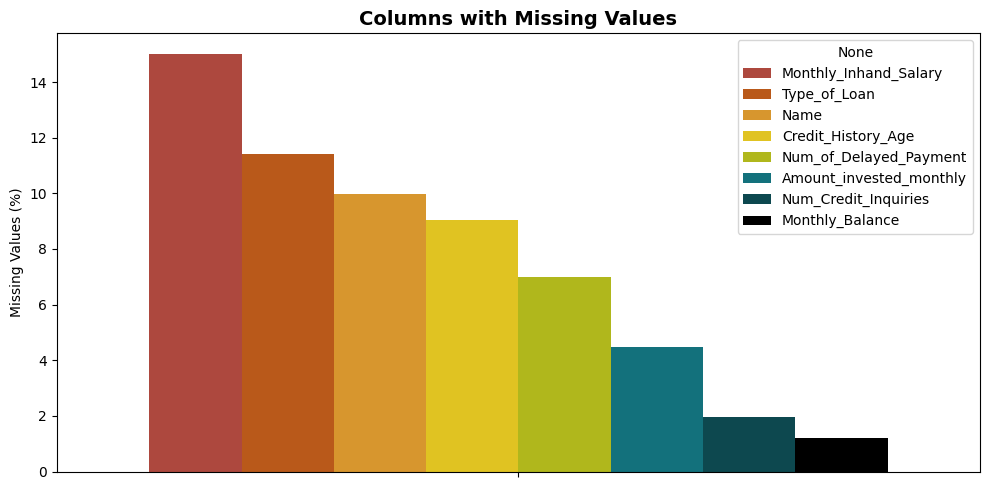

In [7]:

# Eksik değerleri hesapla
missing_percent = (train.isnull().sum() / len(train) * 100).sort_values(ascending=False)
missing_percent = missing_percent[missing_percent > 0]
# Bar chart renkleri belirle
colors = []
for x in missing_percent:
    if x >= 15:
        colors.append('#c0392b')
    elif x >= 10:
        colors.append('#d35400')
    elif x >= 9.5:
        colors.append('#f39c12')
    elif x >= 9:
        colors.append("#ffd903")
    elif x >= 7:
        colors.append("#c7d102")
    elif x >= 4:
        colors.append("#027F8D")
    elif x >= 1.5:
        colors.append("#02515A31")
    else:
        colors.append("#000000")    

# Bar chart
plt.figure(figsize=(10,5))
sns.barplot(hue=missing_percent.index, y=missing_percent.values, palette=colors)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Missing Values (%)')
plt.title('Columns with Missing Values', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


<h1 style="background: linear-gradient(45deg, #e12c2cff, #ffd582ff, #ff6600); 
           -webkit-background-clip: text; 
           -webkit-text-fill-color: transparent;font-weight: bold">
    SIMPLE EDA
</h1>

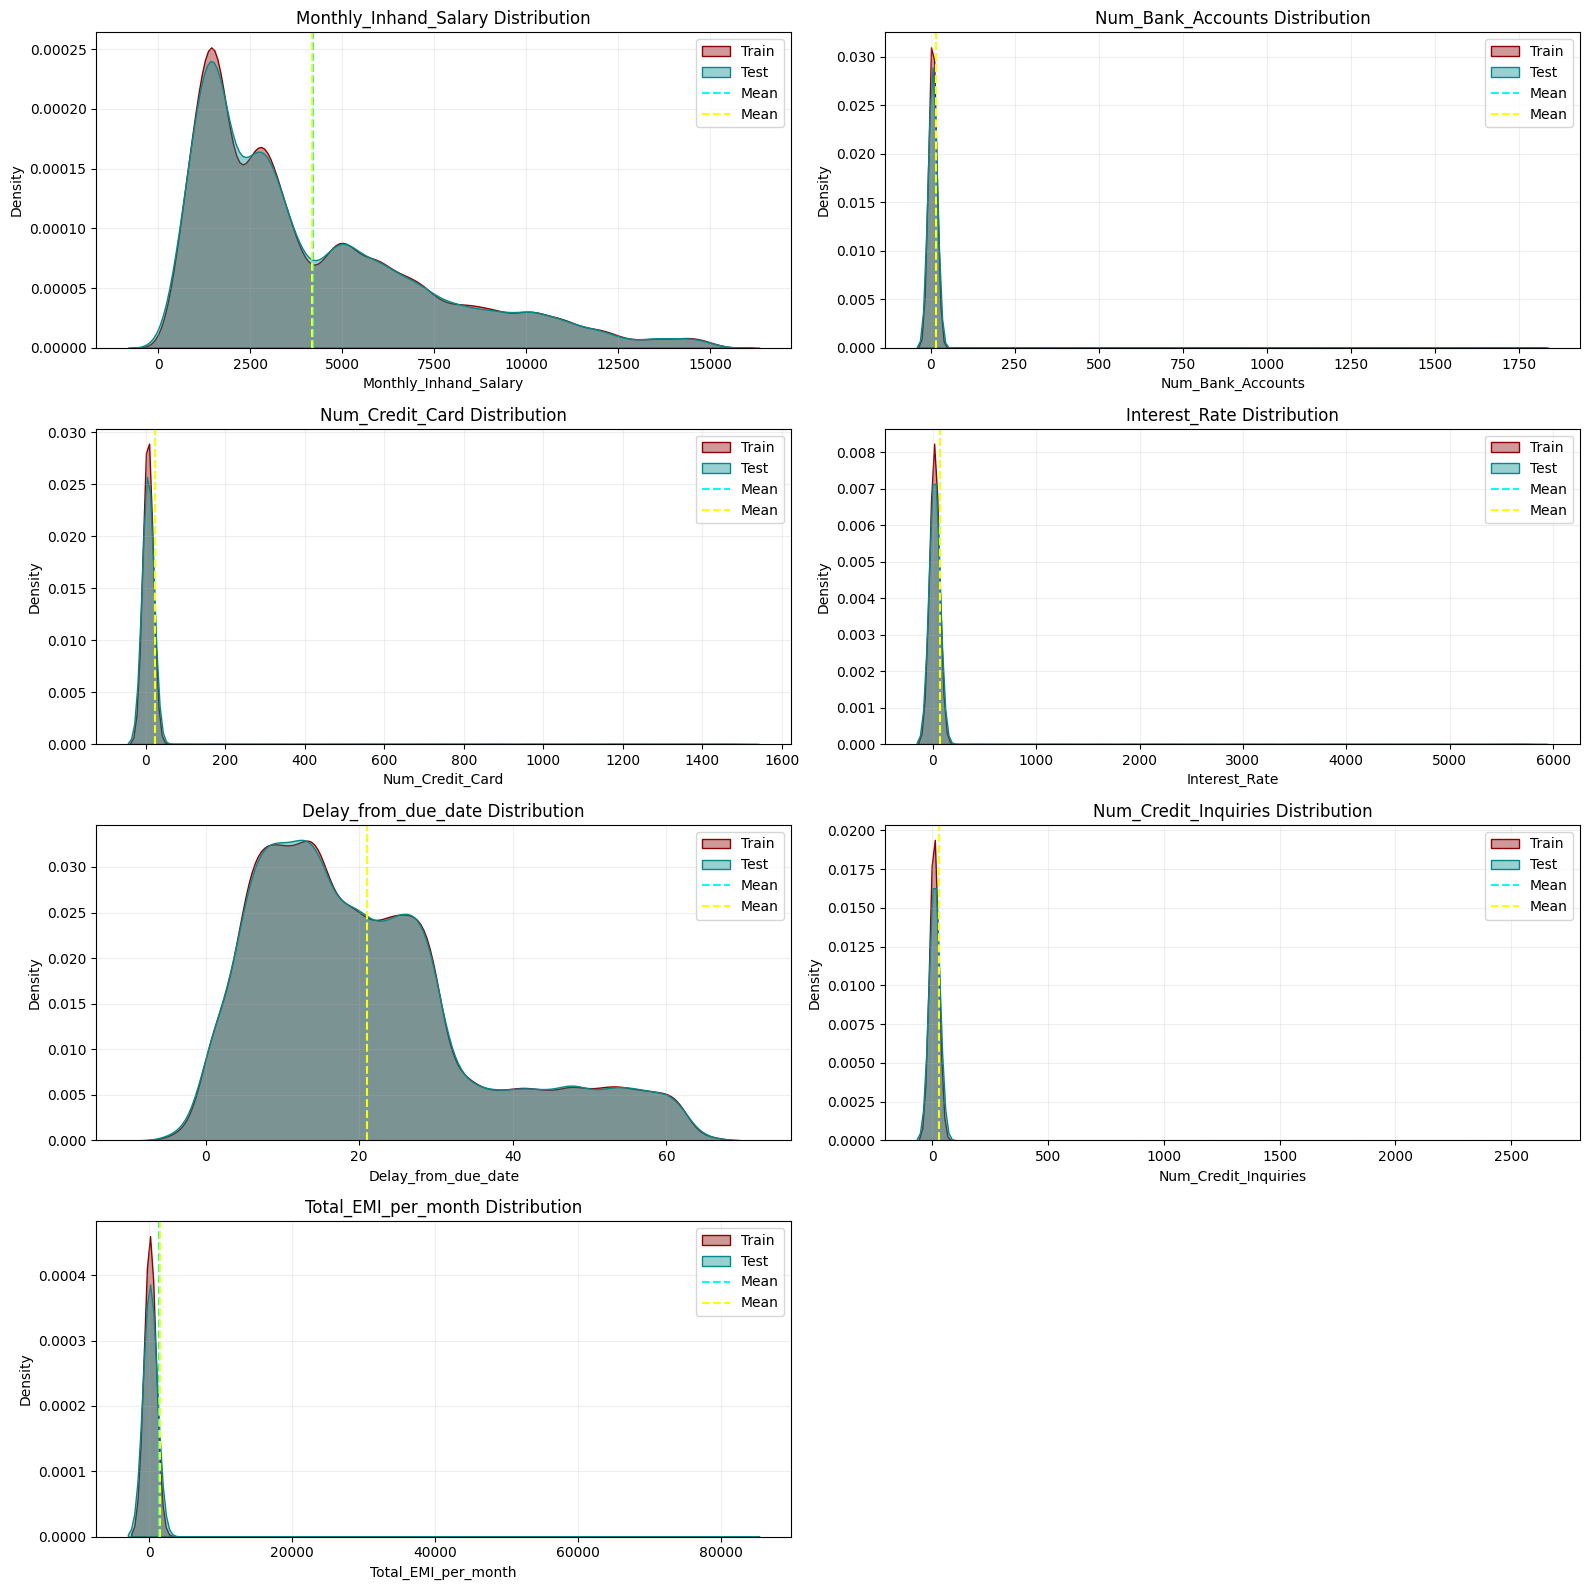

In [8]:
# 1. Continuous (numeric) features
numeric_features = [
    'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Total_EMI_per_month'
]
n_cols = 2
n_rows = int(np.ceil(len(numeric_features)/n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*4))
axes = axes.ravel()

numeric_summary = {}

for i, col in enumerate(numeric_features):
    train_data = train[col].dropna()
    test_data = test[col].dropna()
    
    # Plot both distributions
    sns.kdeplot(train_data, ax=axes[i], fill=True, alpha=0.4, color='darkred', label='Train')
    sns.kdeplot(test_data, ax=axes[i], fill=True, alpha=0.4, color='darkcyan', label='Test')
     
    # Mean lines
    axes[i].axvline(train_data.mean(), color='cyan', linestyle='--', label='Mean')
    axes[i].axvline(test_data.mean(), color='yellow', linestyle='--', label='Mean')

    numeric_summary[col] = {
        'train_mean': train_data.mean(),
        'test_mean': test_data.mean()
    }
    axes[i].set_title(f'{col} Distribution')
    axes[i].grid(True, alpha=0.2)
    axes[i].legend()
    
    
for j in range(len(numeric_features), len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()



<div style="background: linear-gradient(45deg, #930f0fff, #e62121ff, #d55500ff); padding: 20px; border-radius: 12px; color: white; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2>📊 Numeric Feature Insights (Train vs Test)</h2>

  <h3>Monthly_Inhand_Salary</h3>
  <ul>
    <li>Eksik değer: %15 → orta seviyede, median ile doldurmak mantıklı.</li>
    <li>Ortalama: Train=4194, Test=4182 → neredeyse aynı, dağılım benzer.</li>
    <li>Standart sapma: ~3180 → büyük değişkenlik, outlier kontrolü önerilir.</li>
  </ul>

  <h3>Num_Bank_Accounts</h3>
  <ul>
    <li>Eksik yok.</li>
    <li>Ortalama: Train=17.09, Test=16.84 → fark küçük, dağılım uyumlu.</li>
    <li>Standart sapma: ~117 → olası outlier veya bazı müşterilerin çok sayıda hesap sahibi olması.</li>
  </ul>

  <h3>Num_Credit_Card</h3>
  <ul>
    <li>Eksik yok.</li>
    <li>Ortalama: Train=22.47, Test=22.92 → ufak fark, dağılım uyumlu.</li>
    <li>Standart sapma: ~129 → uç değerler olabilir, outlier kontrolü önerilir.</li>
  </ul>

  <h3>Interest_Rate</h3>
  <ul>
    <li>Eksik yok.</li>
    <li>Ortalama farkı: Train=72.47, Test=68.77 → fark %5 civarında, kabul edilebilir ama dikkat.</li>
    <li>Standart sapma: ~450 → dağılım çok geniş, olası aykırı değerler var.</li>
  </ul>

  <h3>Delay_from_due_date</h3>
  <ul>
    <li>Eksik yok.</li>
    <li>Ortalama farkı minimal (Train=21.07, Test=21.05) → uyumlu.</li>
    <li>Standart sapma: ~14.86 → moderate değişkenlik, outlier kontrolü yapılabilir.</li>
  </ul>

  <h3>Num_Credit_Inquiries</h3>
  <ul>
    <li>Eksik: Train=1.96%, Test=2.07% → düşük, basit imputation ile doldurulabilir.</li>
    <li>Ortalama: Train=27.75, Test=30.08 → ufak fark, dikkat edilebilir.</li>
    <li>Standart sapma: ~195 → bazı bireylerde çok yüksek sorgu sayısı olabilir.</li>
  </ul>

  <h3>Total_EMI_per_month</h3>
  <ul>
    <li>Eksik yok.</li>
    <li>Ortalama farkı: Train=1403, Test=1491 → fark %6 civarında, dağılımda ufak farklılık olabilir.</li>
    <li>Standart sapma: ~8500 → kesinlikle aykırı değer kontrolü gerekli.</li>
  </ul>

  <h3>⚠️ Genel Çıkarımlar</h3>
  <ul>
    <li>Çoğu numeric feature için train ve test dağılımları birbirine oldukça yakın → veri kalitesi iyi.</li>
    <li>Bazı kolonlarda çok yüksek standart sapma var → outlier’lar model performansını etkileyebilir.</li>
    <li>Eksik değerler genellikle düşük (%0–2) veya orta seviyede (%15, Monthly_Inhand_Salary).</li>
    <li>Monthly_Inhand_Salary, Num_Credit_Inquiries ve Total_EMI_per_month gibi kolonlarda outlier veya skewness var → log transform veya robust scaler düşünülebilir.</li>
    <li>Train/test mean farkları genellikle minimal → sampling veya data leakage problemi yok.</li>
  </ul>
</div>


Filtered categorical features: ['Month', 'Occupation', 'Payment_of_Min_Amount', 'Payment_Behaviour']


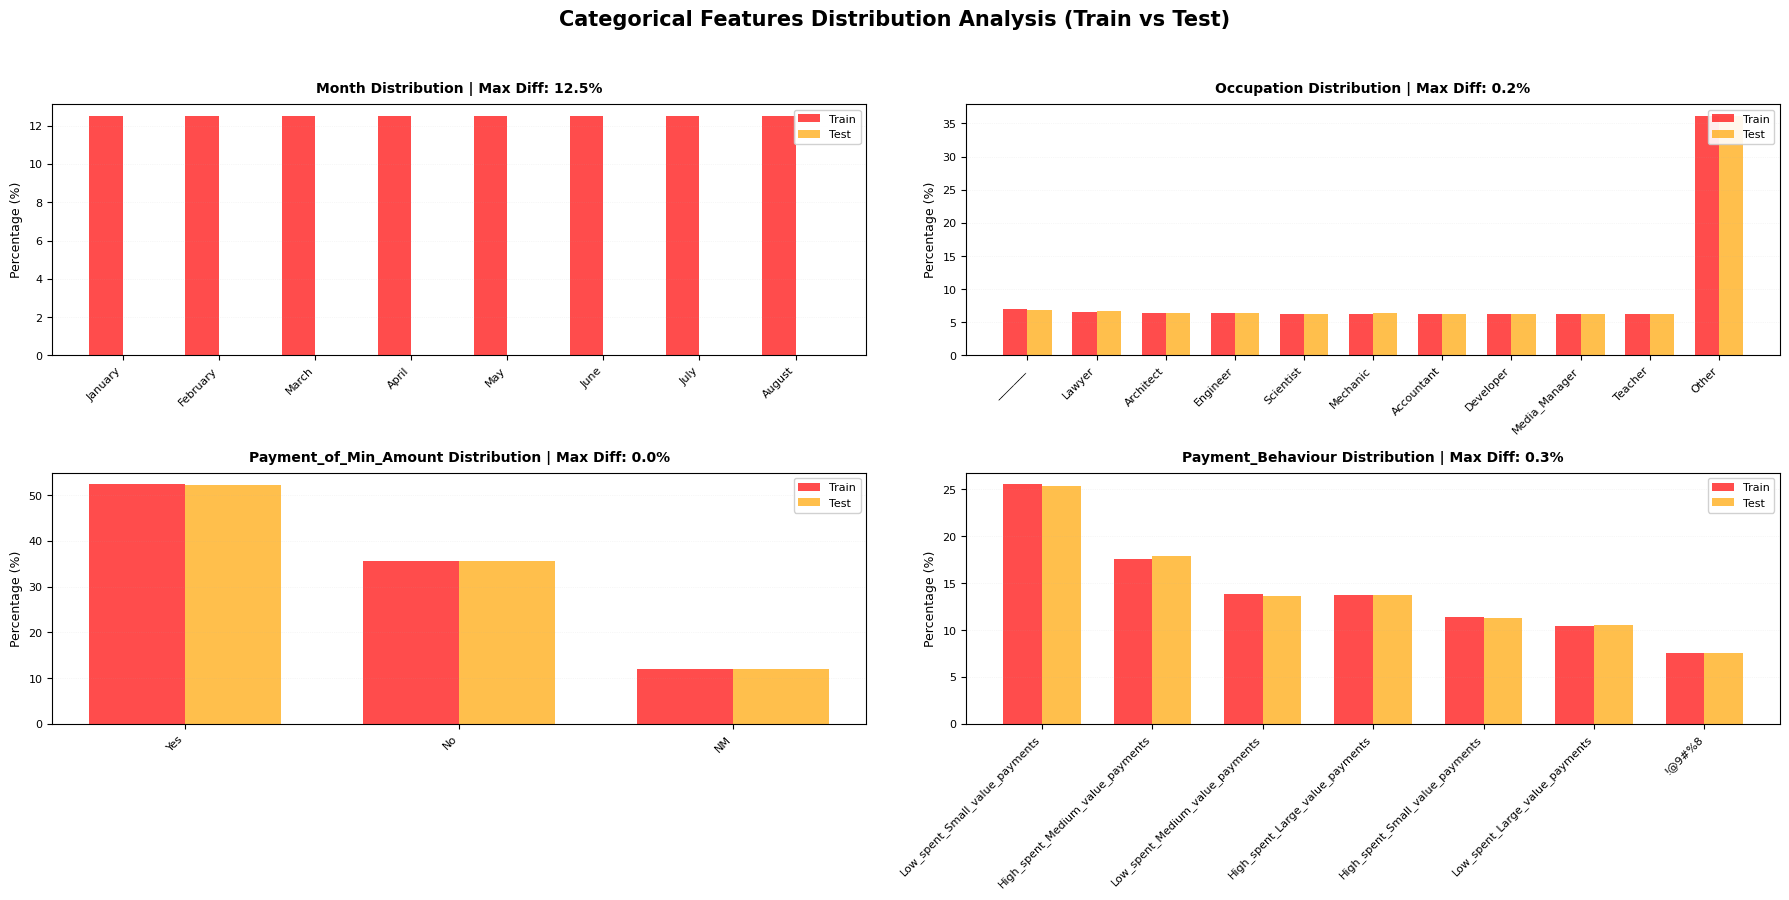

In [9]:
#2.categorical features
# Selected critical categorical features
categorical_features = [
    'Customer_ID', 'Month', 'Occupation', 'Annual_Income',
    'Num_of_Loan', 'Type_of_Loan', 'Credit_History_Age',
    'Payment_of_Min_Amount', 'Amount_invested_monthly',
    'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score'
]

# Filter out high-cardinality categorical features (>50 unique)
max_unique = 50  # maksimum benzersiz kategori
filtered_features = [col for col in categorical_features if col in train.columns and col in test.columns 
                     and train[col].nunique() <= max_unique]

print("Filtered categorical features:", filtered_features)

# Top N categories to plot
top_n = 10


# Plotting
n_cols = 2
n_rows = int(np.ceil(len(filtered_features)/n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows*4.5))
axes = axes.ravel()

for i, col in enumerate(filtered_features):
    # Train counts
    train_counts = train[col].value_counts(normalize=True).head(top_n)
    if train[col].nunique() > top_n:
        train_counts['Other'] = 1 - train_counts.sum()
    train_pct = train_counts * 100
    
    # Test counts
    test_counts = test[col].value_counts(normalize=True).head(top_n)
    if test[col].nunique() > top_n:
        test_counts['Other'] = 1 - test_counts.sum()
    test_pct = test_counts.reindex(train_pct.index, fill_value=0) * 100
    
    # Text summary
    train_missing = train[col].isna().sum() / len(train) * 100
    test_missing = test[col].isna().sum() / len(test) * 100
    max_diff = max(abs(train_pct - test_pct))
    
   
    
    # Plot
    x = np.arange(len(train_pct))
    width = 0.35
    axes[i].bar(x - width/2, train_pct, width, label='Train', color='red', alpha=0.7)
    axes[i].bar(x + width/2, test_pct, width, label='Test', color='orange', alpha=0.7)
    
    axes[i].set_title(
        f'{col} Distribution | Max Diff: {max_diff:.1f}%',
        fontsize=10, pad=8, fontweight='bold'
    )
    axes[i].set_ylabel('Percentage (%)', fontsize=9)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(train_pct.index, rotation=45, ha='right', fontsize=8)
    axes[i].legend(loc='upper right', fontsize=8, framealpha=0.9)
    axes[i].grid(True, alpha=0.2, linestyle=':', linewidth=0.5, axis='y')
    axes[i].tick_params(labelsize=8)

# Hide unused axes
for j in range(len(filtered_features), len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Categorical Features Distribution Analysis (Train vs Test)', fontsize=15, fontweight='bold', y=0.995)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()




In [10]:

summary_dict = {}

for col in categorical_features:
    if col in train.columns:
        total = len(train[col])
        missing = train[col].isna().sum()
        missing_pct = missing / total * 100
        unique_count = train[col].nunique()
        top_val = train[col].value_counts().idxmax()
        top_freq = train[col].value_counts().max()
        
        summary_dict[col] = {
            'total_rows': total,
            'missing_count': missing,
            'missing_pct': missing_pct,
            'unique_count': unique_count,
            'most_frequent_value': top_val,
            'most_frequent_count': top_freq
        }


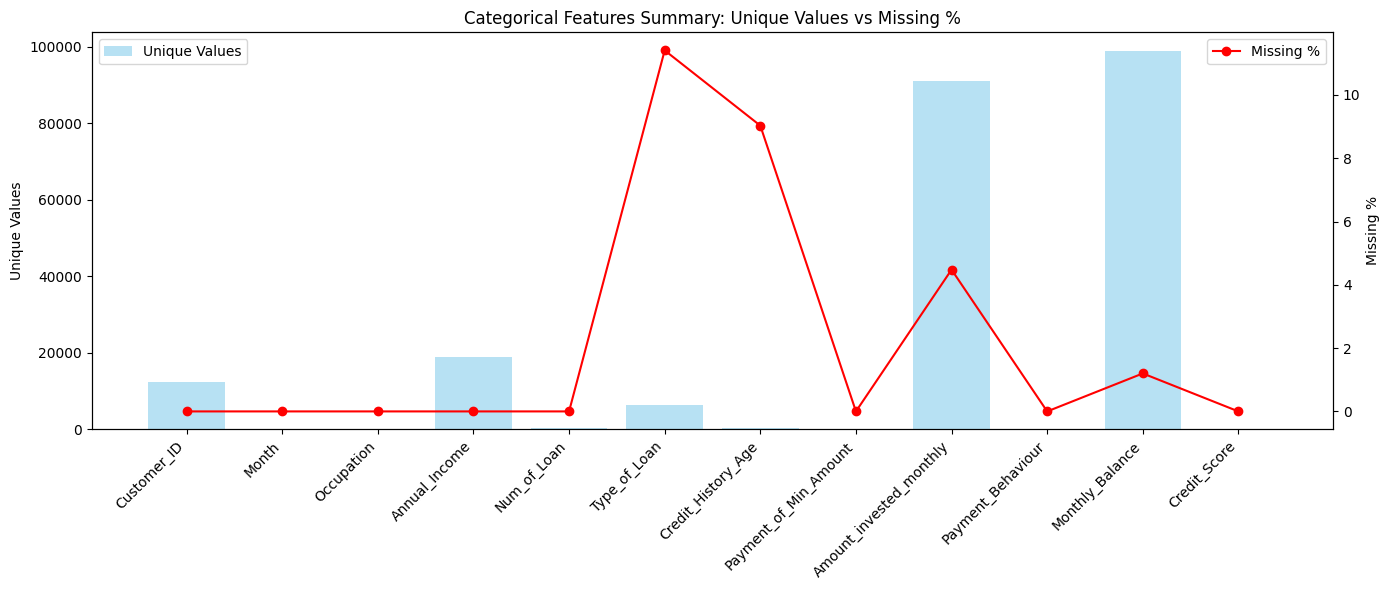

In [11]:

# summary_dict'i DataFrame'e çevir
cat_summary_df = pd.DataFrame.from_dict(summary_dict, orient='index')
cat_summary_df.reset_index(inplace=True)
cat_summary_df.rename(columns={'index':'Feature'}, inplace=True)

# Bar plot
fig, ax1 = plt.subplots(figsize=(14,6))

# Unique values
ax1.bar(cat_summary_df['Feature'], cat_summary_df['unique_count'], alpha=0.6, label='Unique Values', color='skyblue')

# Eksik % için ikinci eksen
ax2 = ax1.twinx()
ax2.plot(cat_summary_df['Feature'], cat_summary_df['missing_pct'], color='red', marker='o', label='Missing %')

# Başlık, label
ax1.set_ylabel('Unique Values')
ax2.set_ylabel('Missing %')
ax1.set_xticks(range(len(cat_summary_df['Feature'])))  # tick pozisyonlarını belirle
ax1.set_xticklabels(cat_summary_df['Feature'], rotation=45, ha='right')
ax1.set_title('Categorical Features Summary: Unique Values vs Missing %')

# Legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


<div style="background: linear-gradient(135deg, #f8f9fa38, #f75b27ff); padding: 15px; border-radius: 10px; font-family: Arial, sans-serif;">
  <h2 style="color:#d35400;">📊 Categorical Features Insights (Train vs Test)</h2>
  
  <ul>
    <li><strong>Eksik Değer Durumu:</strong> Train ve Test setlerinde eksik değer yok (0%).</li>
    <li><strong>Kategori Dağılım Farkları:</strong>
      <ul>
        <li><strong>Month:</strong> Max fark %12.5 → dikkat, bazı aylar farklı temsil ediliyor.</li>
        <li><strong>Occupation:</strong> Max fark %0.19 → dağılımlar uyumlu.</li>
        <li><strong>Payment_of_Min_Amount:</strong> Max fark %0.03 → uyumlu.</li>
        <li><strong>Payment_Behaviour:</strong> Max fark %0.3 → uyumlu.</li>
      </ul>
    </li>
    <li><strong>Kategori Çeşitliliği:</strong>
      <ul>
        <li>Month: 8 kategori (January → August)</li>
        <li>Occupation: 11 kategori</li>
        <li>Payment_of_Min_Amount: 3 kategori</li>
        <li>Payment_Behaviour: 7 kategori (dikkat: "!@9#%8" gibi garip kategori)</li>
      </ul>
    </li>
    <li><strong>Dikkat Edilmesi Gerekenler:</strong>
      <ul>
        <li>Month kolonundaki fark, bazı modellerde performansı etkileyebilir.</li>
        <li>Payment_Behaviour kolonundaki garip kategori temizlenmeli.</li>
      </ul>
    </li>
  </ul>

  <p style="color:#34495e; font-weight:bold;">Özet: Eksik değer yok, dağılımlar çoğunlukla uyumlu, kategoriler mantıklı. Bazı kolonlarda küçük temsili fark ve garip kategori dikkate alınmalı.</p>
</div>


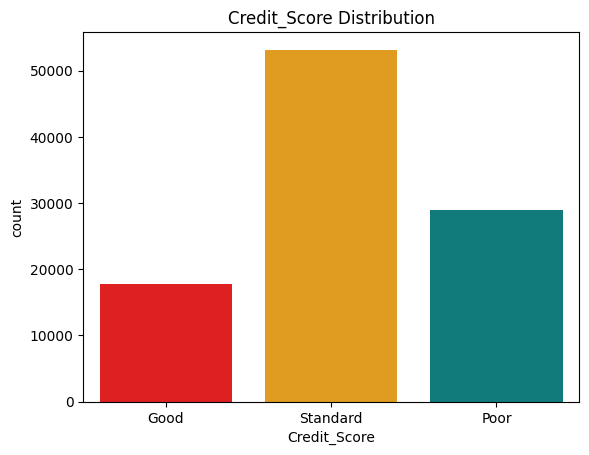

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [12]:
#3️.Target Distribution
# Özel renk paleti (kırmızı, turuncu, darkcyan)
custom_colors = ["red", "orange", "darkcyan"]

sns.countplot(
    data=train,
    x="Credit_Score",
    hue="Credit_Score",      # uyarıyı çözer
    palette=custom_colors,   # belirttiğim renkler
    legend=False             # gereksiz legend kalkar
)

plt.title("Credit_Score Distribution")
plt.show()
train['Credit_Score'].value_counts()


<div style="
    background: linear-gradient(90deg, #fc797957, #ffd455ff); 
    padding: 20px; 
    border-radius: 12px; 
    border: 1px solid #ffd1d1; 
    font-family: Arial, Helvetica, sans-serif; 
    color: #2b2b2b;">
    <h2 style="margin:0 0 10px 0; color:#b30000;">🎯 Credit Score — Class Distribution (Train)</h2>
    <p style="margin:0 0 15px 0;">Aşağıdaki tablo ve yorumlar, <strong>Credit_Score</strong> hedef değişkeninin sınıf dağılımını gösterir.</p>
    <table style="width:100%; border-collapse:collapse; font-size:14px; margin-bottom:15px;">
        <thead>
            <tr style="background: #ffd07eff;">
                <th style="text-align:left; padding:10px; border:1px solid #ffdede;">Class</th>
                <th style="text-align:right; padding:10px; border:1px solid #ffdede;">Count</th>
                <th style="text-align:right; padding:10px; border:1px solid #ffdede;">Percentage</th>
            </tr>
        </thead>
        <tbody>
            <tr style="background: #8f7070ff;">
                <td style="padding:10px; border:1px solid #ffecec;">Standard</td>
                <td style="text-align:right; padding:10px; border:1px solid #ffecec;">53,174</td>
                <td style="text-align:right; padding:10px; border:1px solid #ffecec;">53.17%</td>
            </tr>
            <tr style="background: #929d9fff;">
                <td style="padding:10px; border:1px solid #fff0e6;">Poor</td>
                <td style="text-align:right; padding:10px; border:1px solid #fff0e6;">28,998</td>
                <td style="text-align:right; padding:10px; border:1px solid #fff0e6;">28.99%</td>
            </tr>
            <tr style="background: #e7ff8fff;">
                <td style="padding:10px; border:1px solid #f7fff4;">Good</td>
                <td style="text-align:right; padding:10px; border:1px solid #f7fff4;">17,828</td>
                <td style="text-align:right; padding:10px; border:1px solid #f7fff4;">17.84%</td>
            </tr>
            <tr style="font-weight:bold; background:#fff7f7;">
                <td style="padding:10px; border:1px solid #ffdede;">Total</td>
                <td style="text-align:right; padding:10px; border:1px solid #ffdede;">100,000</td>
                <td style="text-align:right; padding:10px; border:1px solid #ffdede;">100%</td>
            </tr>
        </tbody>
    </table>
<div style="padding:10px; border-radius:8px; background:linear-gradient(90deg,#fff8f0,#fffaf6); border:1px solid #ffe0d0;"> <h3 style="margin:0 0 6px 0; color:#b34d00;">Kısa Değerlendirme</h3> 
<ul style="margin:6px 0 0 18px; line-height:1.5;">
    <li>En büyük sınıf <strong>Standard</strong> (%53), en küçük sınıf <strong>Good</strong> (%17.8).</li> 
    <li>Dağılım <strong>tam dengeli değil</strong> — <em>mild-to-moderate class imbalance</em> var.</li> <li>Bu düzey için <strong>zorunlu aşırı dengeleme</strong> (SMOTE vb.) gerekli değil ama <strong>önerilir</strong>:</li>
        <ul> 
            <li>Model eğitiminde <strong>class_weight</strong> kullan (ör. logistic/ tree modellerde).</li> 
            <li>Performans raporunda sınıf-başına metrikleri (precision/recall/F1) göster.</li> 
            <li>Stratified train/validation split kullan (sınıf oranlarını korur).</li>
        </ul> 
</ul> 
</div> 
<div style="margin-top:10px; padding:10px; border-radius:8px; background:#fffafc; border:1px solid #f1e4dfff;"> 
     <h3 style="margin:0 0 6px 0; color: #037575ff;">Pratik Öneriler — Hızlı</h3> 
     <ol style="margin:6px 0 0 18px; line-height:1.5 ;color: #757303ff;"> 
        <li>Model (baseline): logistic regression + <code>class_weight='balanced'</code> ile başla.</li> 
        <li>Validator: StratifiedKFold (k=5) kullan.</li> 
        <li>Metrikler: accuracy yanı sıra per-class F1 ve recall raporla (özellikle <em>Good</em> sınıfı için).</li> 
        <li>Gerekirse: veri artırma (SMOTE-NC) veya ağırlık optimizasyonu deneyebilirsin.</li> 
     </ol> 
</div> 


In [13]:
# Target encoding
target_col = 'Credit_Score'
le = LabelEncoder()
train[target_col] = le.fit_transform(train[target_col])



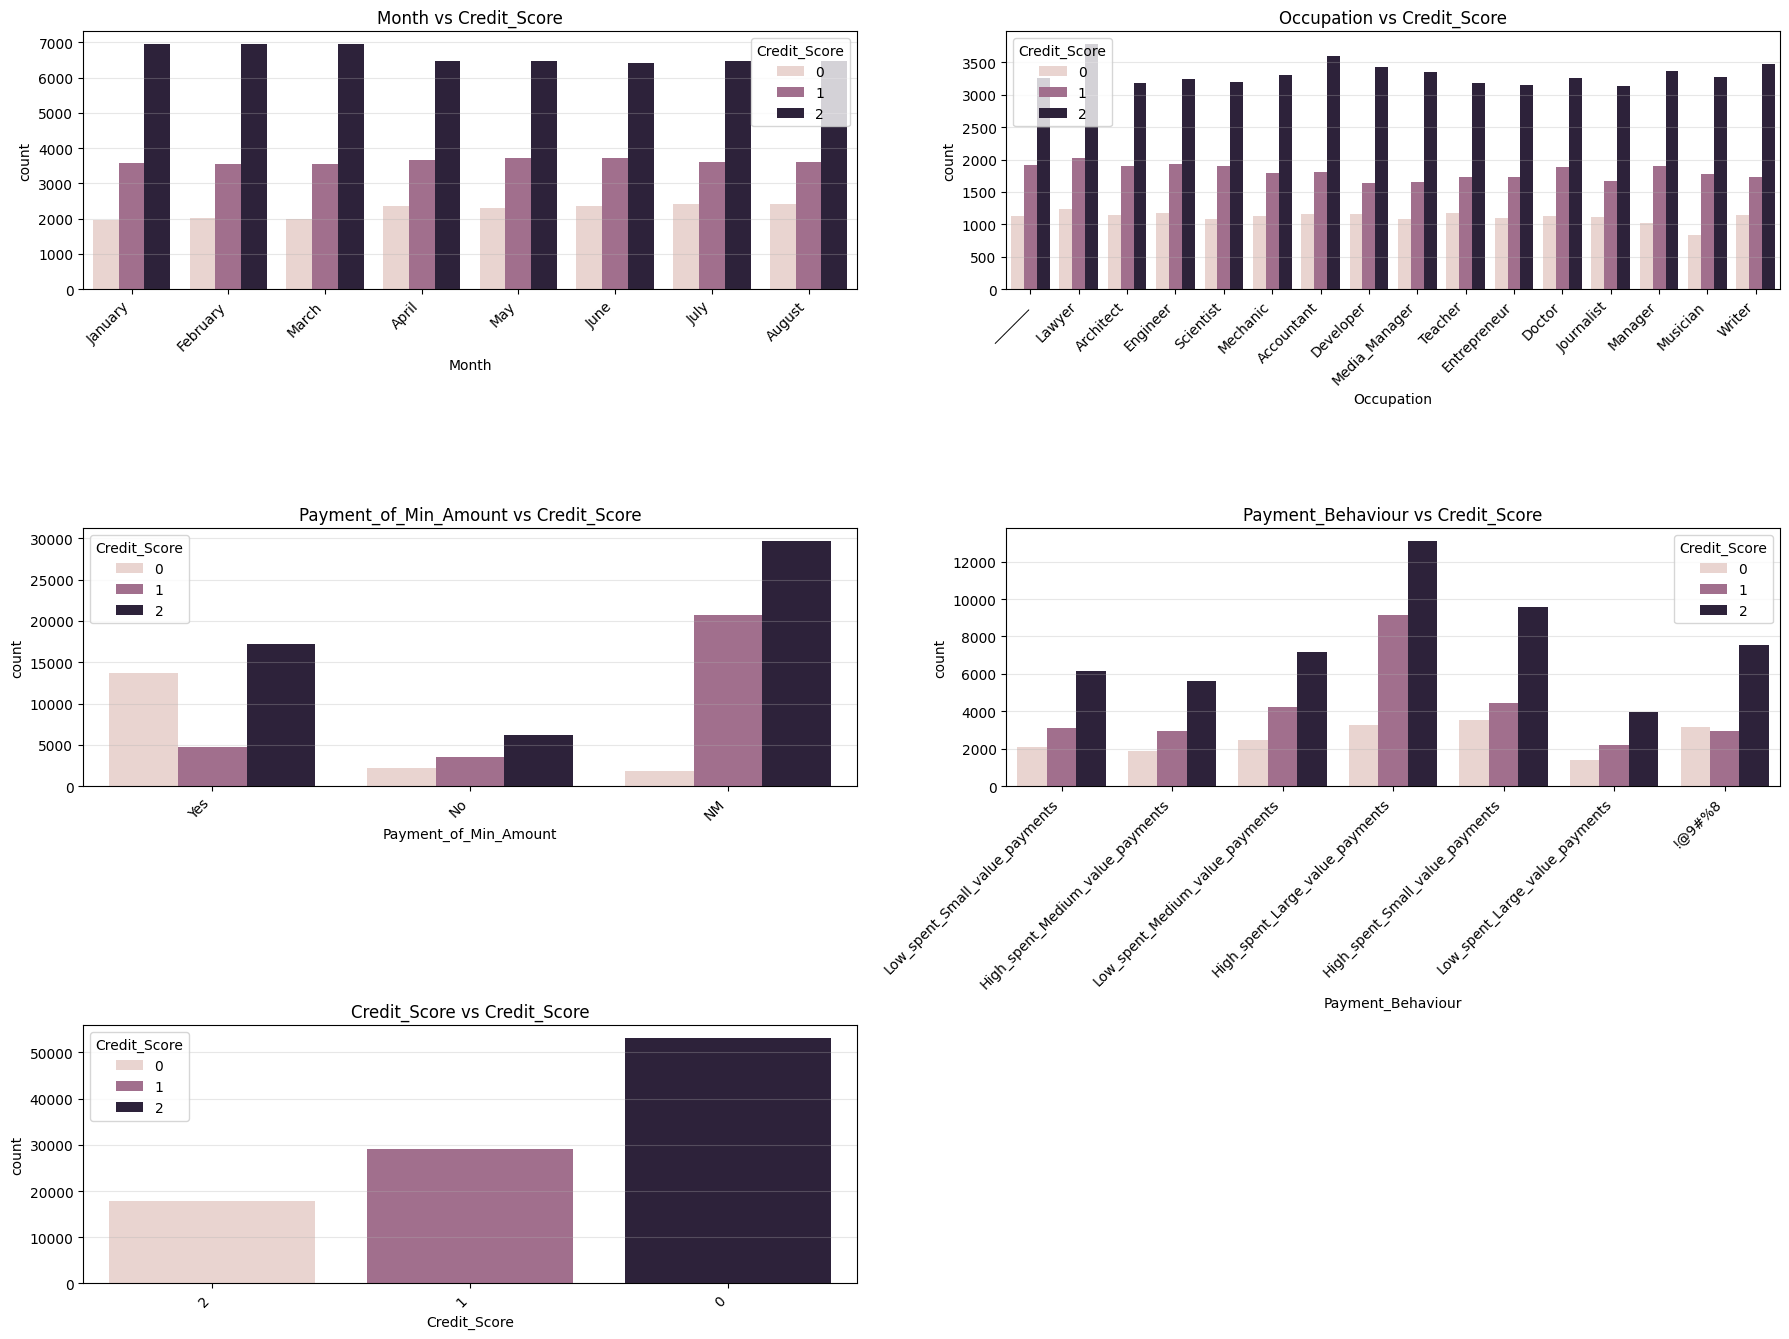

In [14]:

# High-cardinality kolonları atlayalım
high_card_thresh = 20
categorical_features = [col for col in categorical_features if train[col].nunique() <= high_card_thresh]


n_cols = 2
n_rows = int(np.ceil(len(categorical_features)/n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows*4.5))
axes = axes.ravel()

for i, col in enumerate(categorical_features):
    sns.countplot(data=train, x=col, hue='Credit_Score', ax=axes[i])
    axes[i].set_title(f'{col} vs Credit_Score')
    axes[i].legend(title='Credit_Score')
    
    # Tickleri önce belirle, sonra etiketleri değiştir
    axes[i].set_xticks(range(len(train[col].value_counts().index)))
    axes[i].set_xticklabels(train[col].value_counts().index, rotation=45, ha='right')
    
    axes[i].grid(True, axis='y', alpha=0.3)


for j in range(len(categorical_features), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [15]:
from IPython.display import HTML
import pandas as pd

# Same dataset
data = {
    "Feature": [
        "Month", "Month", "Month", 
        "Occupation", "Occupation", "Occupation", 
        "Num_of_Loan", "Num_of_Loan",
        "Payment_of_Min_Amount", "Payment_of_Min_Amount",
        "Payment_Behaviour", "Payment_Behaviour"
    ],
    "Value": [
        "January", "February", "March",
        "Scientist", "Teacher", "Engineer",
        1, 3,
        "Yes", "No",
        "High_spent_Small_value_payments", "Low_spent_Large_value_payments"
    ],
    "Credit_Score_2_%": [
        55.54, 55.56, 55.72,
        51.61, 51.12, 50.96,
        60.37, 55.56,
        56.77, 48.29,
        54.13, 53.85
    ],
    "Credit_Score_1_%": [
        28.66, 28.31, 28.41,
        30.50, 30.49, 30.43,
        28.39, 22.81,
        39.57, 38.33,
        27.23, 28.12
    ],
    "Credit_Score_0_%": [
        15.80, 16.13, 15.87,
        17.89, 18.39, 18.61,
        11.24, 21.63,
        3.65, 13.38,
        18.64, 18.03
    ]
}

df = pd.DataFrame(data)

html = f"""
<style>
.table-box {{
    background: #ffffff;
    padding: 20px;
    border-radius: 12px;
    box-shadow: 0 4px 12px rgba(0,0,0,0.1);
    font-family: 'Segoe UI', sans-serif;
    margin-bottom: 25px;
}}
table {{
    border-collapse: collapse;
    width: 100%;
    color: black;
}}
th {{
    background: linear-gradient(90deg, #2255a4, #4f8bd9);
    color: white;
    padding: 10px;
    text-align: left;
    font-size: 14px;
}}
td {{
    padding: 8px;
    border-bottom: 1px solid #dddddd;
    font-size: 13px;
}}
tr:nth-child(even) {{ background: #f5f7fb; }}
tr:hover {{ background:  #cc0e0e6b; }}
</style>

<div class="table-box">
{df.to_html(index=False)}
</div>
"""

HTML(html)


Feature,Value,Credit_Score_2_%,Credit_Score_1_%,Credit_Score_0_%
Month,January,55.54,28.66,15.80
Month,February,55.56,28.31,16.13
Month,March,55.72,28.41,15.87
Occupation,Scientist,51.61,30.50,17.89
Occupation,Teacher,51.12,30.49,18.39
Occupation,Engineer,50.96,30.43,18.61
Num_of_Loan,1,60.37,28.39,11.24
Num_of_Loan,3,55.56,22.81,21.63
Payment_of_Min_Amount,Yes,56.77,39.57,3.65
Payment_of_Min_Amount,No,48.29,38.33,13.38


<div style="
    background: linear-gradient(145deg, #1e1e1e31, #cc0e0e6b);
    padding: 25px;
    border-radius: 15px;
    color: #e4cdcdf7;
    font-family: 'Segoe UI', sans-serif;
    margin-top: 20px;
    box-shadow: 0 0 20px rgba(225, 193, 193, 0.25);
">
    <h2 style="
        text-align:center;
        background: -webkit-linear-gradient(#ff8c00, #ffd580);
        -webkit-background-clip: text;
        -webkit-text-fill-color: transparent;
        margin-bottom: 20px;"> 📊Feature-Level Credit Score Interpretation
    </h2>
    <p style="font-size:15px; line-height:1.6;">
        Below is an overview of selected categorical and numerical features, showing how each category 
        distributes across the three Credit Score classes (2 = <b>Standard</b>, 1 = <b>Poor</b>, 0 = <b>Good</b>).  
        These percentage splits help identify which attributes correlate with more risky or healthier credit profiles.
    </p>
    <ul style="font-size:14px; line-height:1.7;">
        <li>Columns with extremely high cardinality (e.g., <b>Customer_ID</b>, <b>Annual_Income</b>) are excluded from visual summaries to avoid clutter and misleading patterns.</li>
        <li>The table highlights how different groups behave regarding credit score tendencies — 
            for example, <b>Payment_Behaviour</b> and <b>Payment_of_Min_Amount</b> show clear signal regarding delinquency risk.</li>
        <li>Some features contain missing or noisy data, which needs correction during preprocessing 
            to avoid skewed model learning.</li>
        <li>This table is intended as a snapshot for interpretability and cross-checking category-level model impact.</li>
    </ul>

</div>

# 🎯 Feature Selection ve Preprocessing Planı — Train Set (27+1 kolon)

| Kolon Adı | Tipi | Model Durumu | Preprocessing / Notlar | Domain Bazlı Imputation |
|---------|------|--------------|------------------------|------------------------|
| ID | numeric/string | Drop | %100 unique → modelde anlamsız | - |
| Customer_ID | string | Drop / Optional | Çok unique → sadece grup-level aggregation için kullanılabilir | - |
| Name | string | Drop | Kişisel tanımlayıcı, modele katkısı yok | - |
| SSN | string | Drop | Kişisel tanımlayıcı, modele katkısı yok | - |
| Age | object → numeric | Keep | String içindeki karakterler/units temizlenecek, int’e çevrilecek | Domain bazlı: uygunsuz/missing değerler medyan veya yaş gruplarına göre doldurulabilir |
| Annual_Income | object → numeric | Optional | Çok unique → float’a dönüştürme, outlier kontrolü | Domain bazlı: gelir segmentlerine göre medyan doldurma |
| Monthly_Inhand_Salary | numeric | Keep | Eksik %15 → median ile doldurulacak, outlier kontrolü yapılacak | Domain bazlı: benzer pozisyon veya occupation bazlı medyan kullanılabilir |
| Num_Bank_Accounts | numeric | Keep | Numeric, eksik yok | - |
| Num_Credit_Card | numeric | Keep | Numeric, eksik yok | - |
| Interest_Rate | numeric | Keep | Numeric, eksik yok, outlier kontrolü | - |
| Num_of_Loan | numeric/categorical | Keep | Outlier var (967,-100) → preprocessing ile handle | Domain bazlı: mantıksız sayılar (negatif, aşırı) düzeltilebilir |
| Type_of_Loan | string/multi-label | Keep | Multi-label → split + multi-hot encode | Eksik değerler domain bazlı: “Not Specified” veya loan tipine göre doldurulabilir |
| Delay_from_due_date | numeric | Keep | Numeric, eksik yok, outlier kontrolü | - |
| Payment_of_Min_Amount | categorical | Keep | 3 kategori → ordinal encoding, eksik doldurulacak | Eksik: domain bazlı: önceki ödeme alışkanlığına göre doldurulabilir |
| Num_of_Delayed_Payment | object → numeric | Keep | Parse edilecek ve numeric’e çevrilecek | Eksik: domain bazlı: geçmiş kredi davranışı veya benzer profillere göre imputasyon |
| Credit_History_Age | object → numeric | Keep | "XX Years YY Months" → toplam ay’a çevrilecek | Eksik: domain bazlı: diğer kredi geçmişi ve yaş bilgisine göre doldurulabilir |
| Payment_Behaviour | categorical | Keep | Düşük kategori sayısı → ordinal veya one-hot encode | Eksik: domain bazlı tahmin edilebilir, geçmiş ödeme alışkanlığına göre |
| Credit_Utilization_Ratio | numeric/string | Optional | %100 unique → veri kalite kontrolü, float’a çevir, outlier kontrolü | Eksik/mantıksız: domain bazlı: benzer gelir veya loan tipi ile doldurulabilir |
| Monthly_Balance | numeric | Drop | Tekil veya high-card → model için anlamlı değil | - |
| Amount_invested_monthly | numeric | Drop | Tekil değer → modele anlamlı değil | - |
| Num_Credit_Inquiries | numeric | Keep | Eksik %1.96 → median ile doldurulabilir, outlier kontrolü | Domain bazlı: geçmiş sorgu davranışına göre imputasyon mümkün |
| Total_EMI_per_month | numeric | Keep | Numeric, eksik yok, outlier kontrolü yapılacak | - |
| Occupation | categorical | Keep | 11 kategori → one-hot encode, eksik: "Unknown" | Eksik: domain bazlı doldurma (benzer iş / education profili) |
| Month | categorical | Keep | 8 kategori → one-hot encode | Eksik yok, domain bazlı doldurma gerekmez |
| Payment_Status | categorical | Keep | Düşük kategori → one-hot encode | Eksik: domain bazlı (önceki ödeme durumuna göre) |
| Gender | categorical | Keep | 2 kategori → binary encode | Eksik: domain bazlı doldurma (benzer occupation/age bazlı) |
| Marital_Status | categorical | Keep | Düşük kategori → one-hot encode | Eksik: domain bazlı doldurma (benzer occupation/age bazlı) |
| Other_Income | numeric | Optional | Eksik veya outlier varsa → drop veya domain bazlı imputasyon | Eksik: benzer occupation / gelir grubu bazlı doldurma |
| Credit_Score | target | Keep | Hedef değişken | - |


In [16]:
#  1. Drop high-cardinality / unnecessary columns 
drop_cols = ['ID', 'Customer_ID', 'Name', 'SSN', 'Monthly_Balance', 'Amount_invested_monthly']
train_base = train.drop(columns=drop_cols)
test_base = test.drop(columns=[c for c in drop_cols if c in test.columns])  # test set'te olmayabilir

#  2. Separate target
y = train_base['Credit_Score']
X = train_base.drop(columns=['Credit_Score'])

#  3. Identify numeric and categorical columns 
numeric_cols = X.select_dtypes(include='number').columns.tolist()
categorical_cols = X.select_dtypes(exclude='number').columns.tolist()


<div style="background: linear-gradient(135deg, #f0f8ff35, #ff611eff); padding: 20px; border-radius: 12px; font-family: Arial, sans-serif;">
  <h2 style="color:#c0392b;">📝 Feature Selection & Processing Summary</h2>

  <h3 style="color: #238c9eff;">Drop Edilen Kolonlar</h3>
  <p>ID, Customer_ID, Name, SSN, Monthly_Balance, Amount_invested_monthly → modelde katkısı yok veya high-cardinality → grafikten çıkardık (high_card_thresh=20).</p>

  <h3 style="color:#238c9eff;">Keep / Process</h3>
  <ul>
    <li><strong>Numeric Kolonlar:</strong> parse, outlier kontrol, domain bazlı imputasyon (Age, Monthly_Inhand_Salary, Num_of_Delayed_Payment, Credit_History_Age vs.).</li>
    <li><strong>Categorical Kolonlar:</strong> one-hot veya ordinal encode, eksik değer varsa domain bazlı imputasyon.</li>
  </ul>

  <h3 style="color:#238c9eff;">Optional / High-Cardinality Kolonlar</h3>
  <p>Annual_Income, Credit_Utilization_Ratio, Other_Income → direct drop yerine domain bazlı preprocessing yapılabilir. Bu kolonlar sonraki EDA aşamasında daha detaylı incelenecek.</p>

  <h3 style="color:#238c9eff;">Target</h3>
  <p>Credit_Score → model tahmin edilecek.</p>

  <h3 style="color:#238c9eff;">High-Cardinality Kolonları Neden Çıkardık?</h3>
  <ul>
    <li>Customer_ID, Monthly_Balance → çok benzersiz değer içeriyor → model için anlamlı değil, gereksiz gürültü yaratır.</li>
    <li>high_card_thresh = 20 ile cutoff belirledik.</li>
  </ul>

  <h3 style="color:#238c9eff;">Not</h3>
  <p>Sonraki EDA aşamasında optional / high-cardinality kolonlar daha detaylı incelenecek ve gerekirse preprocessing uygulanacak. Şu an base model oluşturmak için temiz veri seti ile ilerliyoruz.</p>
</div>


In [17]:
# Numeric: median impute + standard scale
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical: mode impute + one-hot encode
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

#  5. Train/Test split (Stratified) 
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)



<h1 style="background: linear-gradient(45deg, #e12c2cff, #ffd582ff, #ff6600); 
           -webkit-background-clip: text; 
           -webkit-text-fill-color: transparent;font-weight: bold">
    BASELINE MODEL - LOGISTIC REGRESSION
</h1>

In [18]:
#6.Baseline Model: Logistic Regression with balanced class weights
baseline_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=1000,
        random_state=42,
        class_weight='balanced'
    ))
])
# CV scores
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Fold bazında skorları saklamak için
acc_scores = []
f1_scores = []
recall_scores = []
# Fold bazında ROC-AUC skorlarını saklamak için
roc_auc_scores = []

fold = 1
for train_index, val_index in cv.split(X, y):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
    
    # Fit model
    baseline_model.fit(X_train_fold, y_train_fold)
    
    # Predict
    y_pred = baseline_model.predict(X_val_fold)
    y_proba = baseline_model.predict_proba(X_val_fold)

    # Metrics
    acc = accuracy_score(y_val_fold, y_pred)
    f1 = f1_score(y_val_fold, y_pred, average='weighted')
    recall = recall_score(y_val_fold, y_pred, average='weighted')
    # ROC-AUC (multi-class, weighted)
    roc_auc = roc_auc_score(y_val_fold, y_proba, multi_class='ovr', average='weighted')
    roc_auc_scores.append(roc_auc)
    
    print(f"Fold {fold} ROC-AUC: {roc_auc:.4f}")

    acc_scores.append(acc)
    f1_scores.append(f1)
    recall_scores.append(recall)
    
    print(f"Fold {fold} Results:")
    print("Accuracy:", acc)
    print("F1 Score:", f1)
    print("Recall:", recall)
    print("Confusion Matrix:\n", confusion_matrix(y_val_fold, y_pred))
    print("Classification Report:\n", classification_report(y_val_fold, y_pred))
    print("-"*50)
    
    fold += 1

# Ortalama skorlar
print("Mean Accuracy:", np.mean(acc_scores))
print("Mean F1 Score:", np.mean(f1_scores))
print("Mean Recall:", np.mean(recall_scores))
print("Mean ROC-AUC (5-Fold):", np.mean(roc_auc_scores))



Fold 1 ROC-AUC: 0.9057
Fold 1 Results:
Accuracy: 0.80065
F1 Score: 0.8006005475336284
Recall: 0.80065
Confusion Matrix:
 [[3138    3  425]
 [  34 5117  648]
 [1340 1537 7758]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.88      0.78      3566
           1       0.77      0.88      0.82      5799
           2       0.88      0.73      0.80     10635

    accuracy                           0.80     20000
   macro avg       0.78      0.83      0.80     20000
weighted avg       0.81      0.80      0.80     20000

--------------------------------------------------
Fold 2 ROC-AUC: 0.9038
Fold 2 Results:
Accuracy: 0.8013
F1 Score: 0.8010700549537054
Recall: 0.8013
Confusion Matrix:
 [[3118    5  443]
 [  19 5116  664]
 [1204 1639 7792]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.87      0.79      3566
           1       0.76      0.88      0.81      5799
       

<div style="background: linear-gradient(135deg, #044149ff, #ea4b27ff); padding: 20px; border-radius: 12px; font-family: Arial, sans-serif;">
  <h2 style="color:#d35400;">📊 Baseline Model Evaluation </h2>

  <h3 style="color:#2980b9;">1. Genel Performans</h3>
  <ul >
    <li>Accuracy: 0.796 – 0.804 | Mean ≈ 0.80 . Yani model genel olarak doğru tahminlerde %80 civarında başarılı.</li>
    <li>F1 Score (weighted): Mean ≈ 0.80 hem precision hem recall dengeli.</li>
    <li>Recall (weighted): Mean ≈ 0.80, yani model sınıfları dengeli yakalamış.</li>
    <li>ROC-AUC: 0.903–0.907, çok iyi. Sınıflar arası ayrımı yüksek oranda başardığını gösteriyor</li>
  </ul>

  <h3 style="color: #2980b9;">2. Sınıf Bazlı Performans (Fold 1)</h3>
  <table style="border-collapse: collapse; width: 100%;">
    <tr style="background-color: #f16868ff;">
      <th style="border: 1px solid #4c2f2fff; padding: 6px;">Class</th>
      <th style="border: 1px solid #4c2f2fff; padding: 6px;">Precision</th>
      <th style="border: 1px solid #4c2f2fff; padding: 6px;">Recall</th>
      <th style="border: 1px solid #4c2f2fff; padding: 6px;">F1-score</th>
      <th style="border: 1px solid #4c2f2fff; padding: 6px;">Support</th>
    </tr>
    <tr>
      <td style="border: 1px solid #999; padding: 6px;">0</td>
      <td style="border: 1px solid #999; padding: 6px;">0.70</td>
      <td style="border: 1px solid #999; padding: 6px;">0.88</td>
      <td style="border: 1px solid #999; padding: 6px;">0.78</td>
      <td style="border: 1px solid #999; padding: 6px;">3566</td>
    </tr>
    <tr>
      <td style="border: 1px solid #999; padding: 6px;">1</td>
      <td style="border: 1px solid #999; padding: 6px;">0.77</td>
      <td style="border: 1px solid #999; padding: 6px;">0.88</td>
      <td style="border: 1px solid #999; padding: 6px;">0.82</td>
      <td style="border: 1px solid #999; padding: 6px;">5799</td>
    </tr>
    <tr>
      <td style="border: 1px solid #999; padding: 6px;">2</td>
      <td style="border: 1px solid #999; padding: 6px;">0.88</td>
      <td style="border: 1px solid #999; padding: 6px;">0.73</td>
      <td style="border: 1px solid #999; padding: 6px;">0.80</td>
      <td style="border: 1px solid #999; padding: 6px;">10635</td>
    </tr>
  </table>

  <h3 style="color:#2980b9;">3. Confusion Matrix ve Genel Eğilimler</h3>
  <ul>
    <li>Model, orta ve büyük sınıfları (1 ve 2) iyi ayırıyor.</li>
    <li>Küçük sınıfta (0) bazı hatalar mevcut, fakat class_weight='balanced' sayesinde performans dengelendi.</li>
    <li>Yanlış tahminler genellikle komşu sınıflara kayıyor → mantıklı hatalar.</li>
  </ul>

  <h3 style="color:#2980b9;">4. Fold Bazlı Tutarlılık</h3>
  <ul>
    <li>Fold’lar arasında accuracy ve F1 score çok benzer (0.796–0.804 aralığında).</li>
    <li>Model overfitting yapmıyor, veri setine genel olarak uyumlu.</li>
  </ul>

  <h3 style="color:#2980b9;">5. Çıkarımlar</h3>
  <ul>
    <li>Baseline Logistic Regression modeli dengeli bir başlangıç sağlıyor.</li>
    <li>Sınıf dengesizliği küçük sınıfta etkili olabilir, fakat <strong>class_weight='balanced'</strong> kullanımı sayesinde denge sağlandı.</li>
    <li>Feature engineering ve scaling ve belki ek modeller ile performansı daha da artırılabilir.</li>
    <li>ROC-AUC yüksek olduğu için model, sınıfları ayırt etmede başarılı, ama küçük sınıf için precision artırılabilir.</li>
  </ul>
</div>
